<a href="https://colab.research.google.com/github/radhika1603/Marketing-Research-Assignment/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-0fba09ea629f>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-1-0fba09ea629f>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Regression Results:
R-squared: 0.626
RMSE: 5447.08

Top 10 most influential features:
                   Feature  Coefficient
0       yearOfRegistration   345.848562
1                  powerPS    85.778441
15        brand_volkswagen    46.849715
9               model_golf    46.849715
16  notRepairedDamage_nein    39.320614
4   vehicleType_kleinwagen    39.320614
6          vehicleType_suv    18.069843
10             model_grand    18.069843
13              brand_jeep    18.069843
11         fuelType_diesel    10.540742


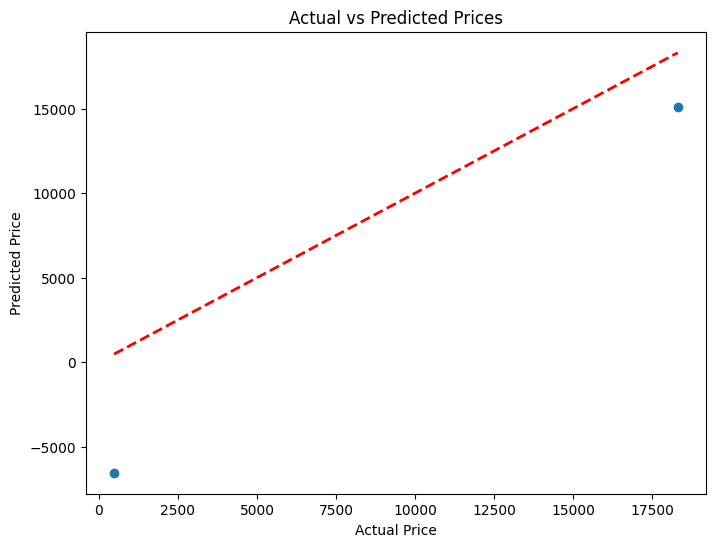

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'dateCrawled': ['24-03-2016 11:52', '24-03-2016 10:58', '14-03-2016 12:52', '17-03-2016 16:54', '31-03-2016 17:25', '04-04-2016 17:36'],
    'name': ['Golf_3_1.6', 'A5_Sportback_2.7_Tdi', 'Jeep_Grand_Cherokee_"Overland"', 'GOLF_4_1_4__3TÃœRER', 'Skoda_Fabia_1.4_TDI_PD_Classic', 'BMW_316i___e36_Limousine___Bastlerfahrzeug__Export'],
    'seller': ['privat', 'privat', 'privat', 'privat', 'privat', 'privat'],
    'offerType': ['Angebot', 'Angebot', 'Angebot', 'Angebot', 'Angebot', 'Angebot'],
    'price': [480, 18300, 9800, 1500, 3600, 650],
    'abtest': ['test', 'test', 'test', 'test', 'test', 'test'],
    'vehicleType': [np.nan, 'coupe', 'suv', 'kleinwagen', 'kleinwagen', 'limousine'],
    'yearOfRegistration': [1993, 2011, 2004, 2001, 2008, 1995],
    'gearbox': ['manuell', 'manuell', 'automatik', 'manuell', 'manuell', 'manuell'],
    'powerPS': [0, 190, 163, 75, 69, 102],
    'model': ['golf', np.nan, 'grand', 'golf', 'fabia', '3er'],
    'kilometer': [150000, 125000, 125000, 150000, 90000, 150000],
    'monthOfRegistration': [0, 5, 8, 6, 7, 10],
    'fuelType': ['benzin', 'diesel', 'diesel', 'benzin', 'diesel', 'benzin'],
    'brand': ['volkswagen', 'audi', 'jeep', 'volkswagen', 'skoda', 'bmw'],
    'notRepairedDamage': [np.nan, 'ja', np.nan, 'nein', 'nein', 'ja']
}

df = pd.DataFrame(data)

def prepare_data(df):
    df = df.copy()

    # Handle missing values
    numeric_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']
    for col in numeric_columns:
        df[col].fillna(df[col].median(), inplace=True)

    categorical_columns = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
                         'model', 'fuelType', 'brand', 'notRepairedDamage']
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    df_dummy = pd.get_dummies(df[categorical_columns], drop_first=True)


    numeric_features = [col for col in numeric_columns if col in df.columns]
    X = pd.concat([df[numeric_features], df_dummy], axis=1)
    y = df['price']

    return X, y

def run_regression_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', ascending=False)

    return model, r2, rmse, coef_df, y_test, y_pred

# Run analysis
X, y = prepare_data(df)
model, r2, rmse, coef_df, y_test, y_pred = run_regression_analysis(X, y)

# Print results
print("\nRegression Results:")
print(f"R-squared: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print("\nTop 10 most influential features:")
print(coef_df.head(10))

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()